# CNN

In [1]:
import matplotlib.pyplot as plt
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout,Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
num_classes = 10

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [119]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [120]:
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(2)
random_seed = 2
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.1, random_state=random_seed)

In [121]:
# normalize
x_train = x_train.astype('float32')/255
x_val = x_val.astype('float32')/255
x_test = x_test.astype('float32')/255

In [122]:
# one hot encode to binary
y_train = keras.utils.to_categorical(y_train, 10)
y_val = keras.utils.to_categorical(y_val, 10)
y_test = keras.utils.to_categorical(y_test, 10)

In [123]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1, 2, figsize = (15, 5))
    
    # Summarize history for Accuracy
    axs[0].plot(range(1, len(model_history.history['acc']) + 1) ,model_history.history['acc'])
    axs[0].plot(range(1, len(model_history.history['val_acc']) + 1), model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1, len(model_history.history['acc']) + 1), len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc = 'best')
    
    # Summarize history for Loss
    axs[1].plot(range(1, len(model_history.history['loss']) + 1), model_history.history['loss'])
    axs[1].plot(range(1, len(model_history.history['val_loss']) + 1), model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1, len(model_history.history['loss']) + 1), len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc = 'best')
    plt.show()

In [124]:
def compare(model2, model3):
    fig, axs = plt.subplots(1, 2, figsize = (15, 5))
    axs[0].plot(range(1, len(model2.history['acc']) + 1) ,model2.history['acc'])
    axs[0].plot(range(1, len(model3.history['acc']) + 1) ,model3.history['acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch Number')
    axs[0].set_xticks(np.arange(1, len(model2.history['acc']) + 1), len(model2.history['acc'])/10)
    axs[0].legend(['model2', 'model3'], loc = 'best')
    
    axs[1].plot(range(1, len(model2.history['loss']) + 1) ,model2.history['loss'])
    axs[1].plot(range(1, len(model3.history['loss']) + 1) ,model3.history['loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch Number')
    axs[1].set_xticks(np.arange(1, len(model2.history['loss']) + 1), len(model2.history['loss'])/10)
    axs[1].legend(['model2', 'model3'], loc = 'best')
    plt.show()


## Simple

In [49]:
batch_size = 32 
num_epochs = 50 
kernel_size = 3 
pool_size = 2 
conv_depth_1 = 8 
conv_depth_2 = 16  
conv_depth_3 = 32 
drop_prob_1 = 0.2 
drop_prob_2 = 0.5 
hidden_size = 128 

In [50]:
# build CNN model
model = Sequential()

In [51]:
# C1: 32 * 32 * 3 -> 32 * 32 * 8
model.add(Conv2D(conv_depth_1, (kernel_size, kernel_size),  padding='same', input_shape=x_train.shape[1:]))
model.add(Activation('relu'))

In [52]:
# P1: 32 * 32 * 8 -> 16 * 16 * 8
model.add(MaxPooling2D((pool_size, pool_size)))
model.add(Dropout(drop_prob_1))

In [53]:
# C2: 16 * 16 * 8 -> 16 * 16 * 16
model.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same'))
model.add(Activation('relu'))

In [54]:
# P2: 16 * 16 * 16 -> 8 * 8 * 16
model.add(MaxPooling2D((pool_size, pool_size)))
model.add(Dropout(drop_prob_1))

In [55]:
# C3: 8 * 8 * 16 -> 8 * 8 * 32
model.add(Conv2D(conv_depth_3, (kernel_size, kernel_size), padding='same'))
model.add(Activation('relu'))

In [56]:
# P3: 8 * 8 * 32 -> 4 * 4 * 32
model.add(MaxPooling2D((pool_size, pool_size)))
model.add(Dropout(drop_prob_1))

In [57]:
# Flatten to 1* 128
model.add(Flatten())
model.add(Dense(hidden_size))
model.add(Activation('relu'))
model.add(Dropout(drop_prob_2))

In [58]:
# F2: 1 * 128 -> 1 * 10
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [59]:
# Defining the optimizer
from keras.optimizers import SGD, Adam
sgd = SGD(lr = 0.01, momentum = 0.9, decay = 0.01/num_epochs, nesterov = False)
adm = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.001/num_epochs)

In [60]:
# Configurating the model for training
model.compile(loss = 'categorical_crossentropy', optimizer = adm, metrics = ['accuracy'])

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 32, 32, 8)         224       
_________________________________________________________________
activation_11 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_12 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 16)          0         
__________

In [62]:
import time
start = time.time()
model_hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs, verbose = 1, validation_data = (x_val, y_val), shuffle = True) 
end = time.time()
print("Model took %0.2f seconds to train"%(end - start))
model.save('cifar10.h5')

Train on 45000 samples, validate on 5000 samples
Epoch 1/50
45000/45000 [==============================] - 42s 928us/step - loss: 1.8175 - acc: 0.3293 - val_loss: 1.5939 - val_acc: 0.4294
Epoch 2/50
45000/45000 [==============================] - 40s 890us/step - loss: 1.5478 - acc: 0.4361 - val_loss: 1.3660 - val_acc: 0.4976
Epoch 3/50
45000/45000 [==============================] - 37s 813us/step - loss: 1.4424 - acc: 0.4768 - val_loss: 1.3062 - val_acc: 0.5336
Epoch 4/50
45000/45000 [==============================] - 37s 822us/step - loss: 1.3793 - acc: 0.4999 - val_loss: 1.2175 - val_acc: 0.5636
Epoch 5/50
45000/45000 [==============================] - 38s 848us/step - loss: 1.3295 - acc: 0.5211 - val_loss: 1.1728 - val_acc: 0.5796
Epoch 6/50
45000/45000 [==============================] - 34s 761us/step - loss: 1.2913 - acc: 0.5351 - val_loss: 1.1314 - val_acc: 0.6028
Epoch 7/50
45000/45000 [==============================] - 32s 721us/step - loss: 1.2654 - acc: 0.5472 - val_loss: 1.1

Loss on validation set: 0.89
Accuracy on validation set: 68.19%


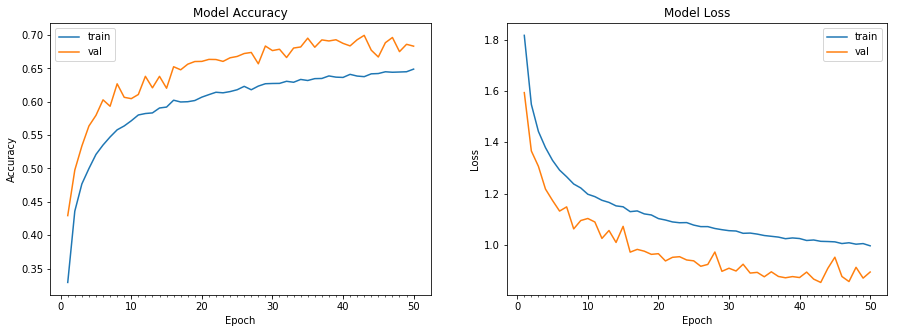

In [64]:
# Evaluating the model
evaluation = model.evaluate(x_test, y_test, verbose = 0)
print("Loss on validation set: %.2f" % evaluation[0])
print("Accuracy on validation set: %.2f%%" % (evaluation[1]*100))

# Ploting accuracy and loss for the model
plot_model_history(model_hist)

## More iteration

In [65]:
batch_size = 32 
num_epochs = 150
kernel_size = 3 
pool_size = 2 
conv_depth_1 = 8 
conv_depth_2 = 16  
conv_depth_3 = 32
drop_prob_1 = 0.2
drop_prob_2 = 0.5 
hidden_size = 128

In [66]:
# build CNN model
model2 = Sequential()

In [67]:
# C1: 32 * 32 * 3 -> 32 * 32 * 8
model2.add(Conv2D(conv_depth_1, (kernel_size, kernel_size),  padding='same', input_shape=x_train.shape[1:]))
model2.add(Activation('relu'))

In [68]:
# P1: 32 * 32 * 8 -> 16 * 16 * 8
model2.add(MaxPooling2D((pool_size, pool_size)))
model2.add(Dropout(drop_prob_1))

In [69]:
# C2: 16 * 16 * 8 -> 16 * 16 * 16
model2.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same'))
model2.add(Activation('relu'))

In [70]:
# P2: 16 * 16 * 16 -> 8 * 8 * 16
model2.add(MaxPooling2D((pool_size, pool_size)))
model2.add(Dropout(drop_prob_1))

In [71]:
# C3: 8 * 8 * 16 -> 8 * 8 * 32
model2.add(Conv2D(conv_depth_3, (kernel_size, kernel_size), padding='same'))
model2.add(Activation('relu'))

In [72]:
# P3: 8 * 8 * 32 -> 4 * 4 * 32
model2.add(MaxPooling2D((pool_size, pool_size)))
model.add(Dropout(drop_prob_1))

In [73]:
# Flatten to 1* 128
model2.add(Flatten())
model2.add(Dense(hidden_size))
model2.add(Activation('relu'))
model2.add(Dropout(drop_prob_2))

In [74]:
# F2: 1 * 128 -> 1 * 10
model2.add(Dense(num_classes))
model2.add(Activation('softmax'))

In [75]:
# Defining the optimizer
from keras.optimizers import SGD, Adam
sgd = SGD(lr = 0.01, momentum = 0.9, decay = 0.01/num_epochs, nesterov = False)
adm = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.001/num_epochs)

In [76]:
# Configurating the model for training
model2.compile(loss = 'categorical_crossentropy', optimizer = adm, metrics = ['accuracy'])

In [77]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 32, 32, 8)         224       
_________________________________________________________________
activation_16 (Activation)   (None, 32, 32, 8)         0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 16, 16, 8)         0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 16, 16, 8)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 16)        1168      
_________________________________________________________________
activation_17 (Activation)   (None, 16, 16, 16)        0         
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 8, 8, 16)          0         
__________

In [78]:
import time
start = time.time()
model_hist2 = model2.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs, verbose = 1, validation_data = (x_val, y_val), shuffle = True) 
end = time.time()
print("Model2 took %0.2f seconds to train"%(end - start))
model2.save('cifar10_2.h5')

Train on 45000 samples, validate on 5000 samples
Epoch 1/150
45000/45000 [==============================] - 38s 855us/step - loss: 1.8306 - acc: 0.3258 - val_loss: 1.5724 - val_acc: 0.4276
Epoch 2/150
45000/45000 [==============================] - 36s 794us/step - loss: 1.5627 - acc: 0.4306 - val_loss: 1.4840 - val_acc: 0.4614
Epoch 3/150
45000/45000 [==============================] - 33s 724us/step - loss: 1.4583 - acc: 0.4730 - val_loss: 1.3580 - val_acc: 0.5096
Epoch 4/150
45000/45000 [==============================] - 40s 884us/step - loss: 1.3914 - acc: 0.5014 - val_loss: 1.3180 - val_acc: 0.5288
Epoch 5/150
45000/45000 [==============================] - 33s 724us/step - loss: 1.3457 - acc: 0.5162 - val_loss: 1.2225 - val_acc: 0.5652
Epoch 6/150
45000/45000 [==============================] - 32s 714us/step - loss: 1.3058 - acc: 0.5325 - val_loss: 1.1762 - val_acc: 0.5814
Epoch 7/150
45000/45000 [==============================] - 33s 728us/step - loss: 1.2734 - acc: 0.5439 - val_lo

Epoch 59/150
45000/45000 [==============================] - 32s 711us/step - loss: 0.9260 - acc: 0.6719 - val_loss: 0.8815 - val_acc: 0.6926
Epoch 60/150
45000/45000 [==============================] - 32s 711us/step - loss: 0.9287 - acc: 0.6728 - val_loss: 0.9362 - val_acc: 0.6700
Epoch 61/150
45000/45000 [==============================] - 32s 706us/step - loss: 0.9251 - acc: 0.6747 - val_loss: 0.9386 - val_acc: 0.6752
Epoch 62/150
45000/45000 [==============================] - 32s 712us/step - loss: 0.9138 - acc: 0.6757 - val_loss: 0.8904 - val_acc: 0.6866
Epoch 63/150
45000/45000 [==============================] - 32s 718us/step - loss: 0.9087 - acc: 0.6806 - val_loss: 0.8967 - val_acc: 0.6828
Epoch 64/150
45000/45000 [==============================] - 33s 725us/step - loss: 0.9096 - acc: 0.6814 - val_loss: 1.0002 - val_acc: 0.6554
Epoch 65/150
45000/45000 [==============================] - 32s 718us/step - loss: 0.9054 - acc: 0.6791 - val_loss: 0.8379 - val_acc: 0.7034
Epoch 66/150


Epoch 117/150
45000/45000 [==============================] - 30s 673us/step - loss: 0.8484 - acc: 0.6991 - val_loss: 0.8845 - val_acc: 0.7010
Epoch 118/150
45000/45000 [==============================] - 31s 690us/step - loss: 0.8486 - acc: 0.7018 - val_loss: 0.8785 - val_acc: 0.7006
Epoch 119/150
45000/45000 [==============================] - 30s 671us/step - loss: 0.8457 - acc: 0.7018 - val_loss: 0.8160 - val_acc: 0.7178
Epoch 120/150
45000/45000 [==============================] - 30s 673us/step - loss: 0.8489 - acc: 0.7010 - val_loss: 0.8198 - val_acc: 0.7200
Epoch 121/150
45000/45000 [==============================] - 30s 673us/step - loss: 0.8482 - acc: 0.7013 - val_loss: 0.7932 - val_acc: 0.7246
Epoch 122/150
45000/45000 [==============================] - 30s 678us/step - loss: 0.8479 - acc: 0.7006 - val_loss: 0.8187 - val_acc: 0.7184
Epoch 123/150
45000/45000 [==============================] - 30s 676us/step - loss: 0.8420 - acc: 0.7034 - val_loss: 0.8206 - val_acc: 0.7168
Epoch 

Loss on validation set: 0.87
Accuracy on validation set: 70.39%


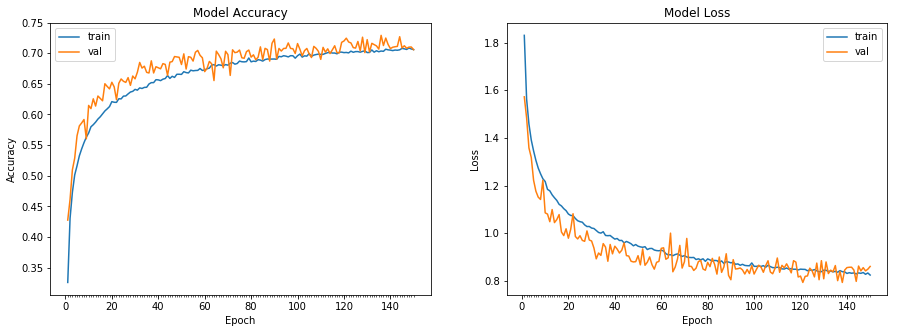

In [95]:
# Evaluating the model
evaluation = model2.evaluate(x_test, y_test, verbose = 0)
print("Loss on validation set: %.2f" % evaluation[0])
print("Accuracy on validation set: %.2f%%" % (evaluation[1]*100))

# Ploting accuracy and loss for the model
plot_model_history(model_hist2)

## Deeper ConvNet

In [125]:
batch_size = 32
num_epochs = 150
kernel_size = 3 
pool_size = 2 
conv_depth_1 = 16 
conv_depth_2 = 32  
conv_depth_3 = 64
conv_depth_4 = 128 
drop_prob_1 = 0.25 
drop_prob_2 = 0.5
hidden_size = 256

In [126]:
# build CNN model
model3 = Sequential()

In [127]:
# C1: 32 * 32 * 3 -> 32 * 32 * 16
model3.add(Conv2D(conv_depth_1, (kernel_size, kernel_size),  padding='same', input_shape=x_train.shape[1:]))
model3.add(Activation('relu'))

In [128]:
# P1: 32 * 32 * 16 -> 16 * 16 * 16
model3.add(MaxPooling2D((pool_size, pool_size)))
model3.add(Dropout(drop_prob_1))

In [129]:
# C2: 16 * 16 * 16 -> 16 * 16 * 32
model3.add(Conv2D(conv_depth_2, (kernel_size, kernel_size), padding='same'))
model3.add(Activation('relu'))

In [130]:
# P2: 16 * 16 * 32 -> 8 * 8 * 32
model3.add(MaxPooling2D((pool_size, pool_size)))
model3.add(Dropout(drop_prob_1))

In [131]:
# C3: 8 * 8 * 32 -> 8 * 8 * 64
model3.add(Conv2D(conv_depth_3, (kernel_size, kernel_size), padding='same'))
model3.add(Activation('relu'))

In [132]:
# P3: 8 * 8 * 64 -> 4 * 4 * 64
model3.add(MaxPooling2D((pool_size, pool_size)))
model3.add(Dropout(drop_prob_1))

In [133]:
# C4: 4 * 4 * 64 -> 4 * 4 * 128
model3.add(Conv2D(conv_depth_3, (kernel_size, kernel_size), padding='same'))
model3.add(Activation('relu'))

In [134]:
# P4: 4 * 4 * 128 -> 2 * 2 * 128
model3.add(MaxPooling2D((pool_size, pool_size)))
model3.add(Dropout(drop_prob_1))

In [135]:
# Flatten to 1 * 256
model3.add(Flatten())
model3.add(Dense(hidden_size))
model3.add(Activation('relu'))
model3.add(Dropout(drop_prob_2))

In [136]:
# F2: 1 * 256 -> 1 * 10
model3.add(Dense(num_classes))
model3.add(Activation('softmax'))

In [137]:
# Defining the optimizer
from keras.optimizers import SGD, Adam
sgd = SGD(lr = 0.01, momentum = 0.9, decay = 0.01/num_epochs, nesterov = False)
adm = Adam(lr = 0.001, beta_1 = 0.9, beta_2 = 0.999, epsilon = 1e-08, decay = 0.001/num_epochs)

In [138]:
# Configurating the model for training
model3.compile(loss = 'categorical_crossentropy', optimizer = adm, metrics = ['accuracy'])

In [139]:
model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 32, 32, 16)        448       
_________________________________________________________________
activation_33 (Activation)   (None, 32, 32, 16)        0         
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 16, 16, 16)        0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 16, 16, 32)        4640      
_________________________________________________________________
activation_34 (Activation)   (None, 16, 16, 32)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 8, 8, 32)          0         
__________

In [141]:
import time
start = time.time()
model_hist3 = model3.fit(x_train, y_train, batch_size = batch_size, epochs = num_epochs, verbose = 1, validation_data = (x_val, y_val), shuffle = True) 
end = time.time()
print("Model3 took %0.2f seconds to train"%(end - start))
model3.save('cifar10_3.h5')

Train on 45000 samples, validate on 5000 samples
Epoch 1/150
45000/45000 [==============================] - 55s 1ms/step - loss: 1.8040 - acc: 0.3238 - val_loss: 1.5429 - val_acc: 0.4314
Epoch 2/150
45000/45000 [==============================] - 58s 1ms/step - loss: 1.5048 - acc: 0.4478 - val_loss: 1.3586 - val_acc: 0.5082
Epoch 3/150
45000/45000 [==============================] - 64s 1ms/step - loss: 1.3850 - acc: 0.4956 - val_loss: 1.2437 - val_acc: 0.5502
Epoch 4/150
45000/45000 [==============================] - 61s 1ms/step - loss: 1.3106 - acc: 0.5248 - val_loss: 1.1974 - val_acc: 0.5676
Epoch 5/150
45000/45000 [==============================] - 62s 1ms/step - loss: 1.2576 - acc: 0.5449 - val_loss: 1.1031 - val_acc: 0.6124
Epoch 6/150
45000/45000 [==============================] - 58s 1ms/step - loss: 1.2207 - acc: 0.5623 - val_loss: 1.0488 - val_acc: 0.6236
Epoch 7/150
45000/45000 [==============================] - 53s 1ms/step - loss: 1.1795 - acc: 0.5741 - val_loss: 1.0213 - v

Epoch 118/150
45000/45000 [==============================] - 52s 1ms/step - loss: 0.7513 - acc: 0.7369 - val_loss: 0.7235 - val_acc: 0.7500
Epoch 119/150
45000/45000 [==============================] - 51s 1ms/step - loss: 0.7493 - acc: 0.7393 - val_loss: 0.6821 - val_acc: 0.7604
Epoch 120/150
45000/45000 [==============================] - 51s 1ms/step - loss: 0.7457 - acc: 0.7403 - val_loss: 0.7065 - val_acc: 0.7526
Epoch 121/150
45000/45000 [==============================] - 52s 1ms/step - loss: 0.7508 - acc: 0.7384 - val_loss: 0.6830 - val_acc: 0.7684
Epoch 122/150
45000/45000 [==============================] - 52s 1ms/step - loss: 0.7479 - acc: 0.7385 - val_loss: 0.6849 - val_acc: 0.7626
Epoch 123/150
45000/45000 [==============================] - 51s 1ms/step - loss: 0.7439 - acc: 0.7408 - val_loss: 0.6798 - val_acc: 0.7646
Epoch 124/150
45000/45000 [==============================] - 52s 1ms/step - loss: 0.7468 - acc: 0.7382 - val_loss: 0.7269 - val_acc: 0.7466
Epoch 125/150
45000/

Loss on validation set: 0.79
Accuracy on validation set: 73.38%


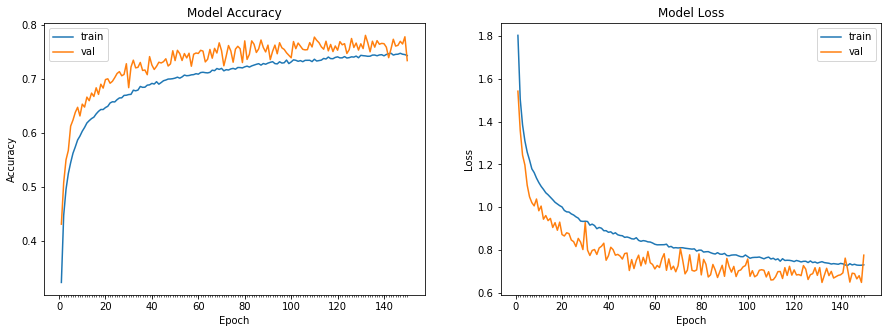

In [142]:
# Evaluating the model
evaluation = model3.evaluate(x_test, y_test, verbose = 0)
print("Loss on validation set: %.2f" % evaluation[0])
print("Accuracy on validation set: %.2f%%" % (evaluation[1]*100))

# Ploting accuracy and loss for the model
plot_model_history(model_hist3)

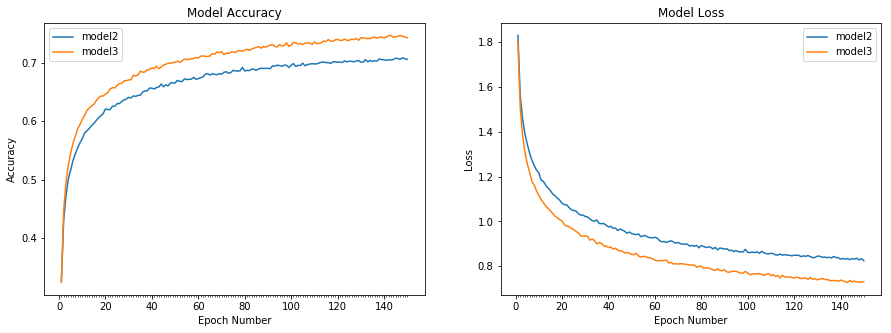

In [143]:
compare(model_hist2, model_hist3)

# knn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier

np.random.seed(2)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.datasets import cifar10
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau
sns.set(style='white', context='notebook', palette='deep')

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

Y_train = Y_train.transpose()[0]
Y_test = Y_test.transpose()[0]

Using TensorFlow backend.


In [2]:
#Processing loaded images to get prepared for KNN algorithm
from sklearn.preprocessing import MinMaxScaler
#Convert to each image to 1-D vector
X_train = X_train.reshape(X_train.shape[0],32*32*3)
X_test = X_test.reshape(X_test.shape[0],32*32*3)
print(X_train)
#Scale test_images_vector
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

[[ 59  62  63 ... 123  92  72]
 [154 177 187 ... 143 133 144]
 [255 255 255 ...  80  86  84]
 ...
 [ 35 178 235 ...  12  31  50]
 [189 211 240 ... 195 190 171]
 [229 229 239 ... 163 163 161]]


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [ ]:
#Applying KNN algorithm
from sklearn.neighbors import KNeighborsClassifier

k = [1,2,3,10,20,30,50,70,100,200]
for i in k:
    model = KNeighborsClassifier(weights = 'distance',  n_neighbors = i, algorithm = 'auto', n_jobs = 6,leaf_size = 60)
    model.fit(X_train, Y_train)
    preds = model.predict(X_test)
    print('When k = %s, Test Accuracy = %f' % (i, np.mean(Y_test==preds)))

# Random forest

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.datasets import cifar10

In [3]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()

In [4]:
#reshape the matrix
x_train_rows = X_train.reshape(X_train.shape[0], 32 * 32 *3)
x_test_rows = X_test.reshape(X_test.shape[0], 32*32*3)
Y_train = Y_train.reshape(Y_train.shape[0],)
Y_val = Y_test.reshape(Y_test.shape[0],)
from sklearn import preprocessing 
normalizer = preprocessing.Normalizer()
x_train_rows = normalizer.fit_transform(x_train_rows)
x_test_rows = normalizer.fit_transform(x_test_rows)

In [5]:
alg = RandomForestClassifier(max_depth = 100, n_estimators=50, random_state=300)
alg.fit(x_train_rows, Y_train)
predict = alg.predict(x_test_rows)

In [6]:
(Y_val == predict).mean()

0.4433

# Desicion Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier  
from sklearn.model_selection import cross_val_score
clf = DecisionTreeClassifier(random_state=0)  
scores = cross_val_score(clf, x_train_rows, Y_train)  

In [ ]:
clf = DecisionTreeClassifier(random_state=0)  
clf.fit(x_train_rows, Y_train)
predict = clf.predict(x_test_rows) 
(Y_val == predict).mean()